In [15]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, datasets
import os

# Red Neuronal Convolucional - Simple dataset MNIST

In [16]:
# Cargar el dataset MNIST
#data_dir = os.path.join('..', 'datasets', 'MNIST_data')
data_dir = "C:\\Users\\jrgui\\Documents\\GitHub\\Practica_TensorFlow\\datasets\\MNIST_data"
mnist = tf.keras.datasets.mnist.load_data(path=os.path.join(data_dir, 'mnist.npz'))

(train_xdata, train_labels), (test_xdata, test_labels) = mnist

# Preprocesar los datos
train_xdata = np.expand_dims(train_xdata / 255.0, axis=-1)
test_xdata = np.expand_dims(test_xdata / 255.0, axis=-1)

batch_size = 100
learning_rate = 0.005
evaluation_size = 500
image_width = train_xdata.shape[1]
image_height = train_xdata.shape[2]
target_size = 10
num_channels = 1
generations = 500
eval_every = 20
conv1_features = 25
conv2_features = 50
max_pool_size1 = 2
max_pool_size2 = 2
full_connected_size1 = 100

# Definir el modelo utilizando la API de Keras
model = models.Sequential([
    layers.Input(shape=(image_width, image_height, num_channels)),  # Definir la entrada explícitamente
    layers.Conv2D(conv1_features, kernel_size=(4, 4), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(max_pool_size1, max_pool_size1), strides=(max_pool_size1, max_pool_size1), padding='same'),
    
    layers.Conv2D(conv2_features, kernel_size=(4, 4), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(max_pool_size2, max_pool_size2), strides=(max_pool_size2, max_pool_size2), padding='same'),
    
    layers.Flatten(),
    layers.Dense(full_connected_size1, activation='relu'),
    layers.Dense(target_size)
])

# Definir la función de pérdida y el optimizador
loss_fn = losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Compilar el modelo
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Entrenamiento
train_loss = []
train_acc = []
test_acc = []
i_vals = []


for i in range(generations):
    rand_idx = np.random.choice(len(train_xdata), size=batch_size)
    rand_x = train_xdata[rand_idx]
    rand_y = train_labels[rand_idx]

    # Asegurarse de que las entradas tengan la misma forma en cada iteración
    rand_x = np.array(rand_x, dtype=np.float32)
    rand_y = np.array(rand_y, dtype=np.int32)

    history = model.train_on_batch(rand_x, rand_y)
    temp_train_loss, temp_train_acc = history

    if (i+1) % eval_every == 0:
        rand_idx_eval = np.random.choice(len(test_xdata), size=evaluation_size)
        rand_x_eval = test_xdata[rand_idx_eval]
        rand_y_eval = test_labels[rand_idx_eval]
        
        eval_loss, eval_acc = model.evaluate(rand_x_eval, rand_y_eval, verbose=0)
        
        i_vals.append(i+1)
        train_loss.append(temp_train_loss)
        train_acc.append(temp_train_acc * 100)
        test_acc.append(eval_acc * 100)

        print(f"Iteración {i+1} Train Loss: {temp_train_loss:.3f} Train Acc: {temp_train_acc*100:.3f} Test Acc: {eval_acc*100:.3f}")


Iteración 20 Train Loss: 2.283 Train Acc: 12.800 Test Acc: 15.400
Iteración 40 Train Loss: 2.203 Train Acc: 27.800 Test Acc: 48.400
Iteración 60 Train Loss: 1.909 Train Acc: 53.400 Test Acc: 69.200
Iteración 80 Train Loss: 1.061 Train Acc: 75.560 Test Acc: 84.000
Iteración 100 Train Loss: 0.522 Train Acc: 84.440 Test Acc: 87.800
Iteración 120 Train Loss: 0.405 Train Acc: 87.760 Test Acc: 86.400
Iteración 140 Train Loss: 0.399 Train Acc: 87.440 Test Acc: 88.200
Iteración 160 Train Loss: 0.357 Train Acc: 88.920 Test Acc: 92.000
Iteración 180 Train Loss: 0.297 Train Acc: 90.720 Test Acc: 88.400
Iteración 200 Train Loss: 0.297 Train Acc: 90.200 Test Acc: 92.200
Iteración 220 Train Loss: 0.292 Train Acc: 91.720 Test Acc: 91.600
Iteración 240 Train Loss: 0.260 Train Acc: 91.880 Test Acc: 92.400
Iteración 260 Train Loss: 0.266 Train Acc: 92.080 Test Acc: 93.000
Iteración 280 Train Loss: 0.234 Train Acc: 92.600 Test Acc: 90.200
Iteración 300 Train Loss: 0.214 Train Acc: 93.240 Test Acc: 93.600

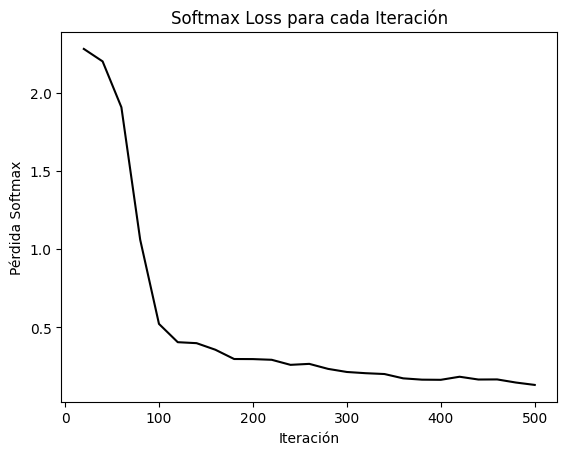

In [17]:
# Graficar la pérdida
plt.plot(i_vals, train_loss, 'k-')
plt.title("Softmax Loss para cada Iteración")
plt.xlabel("Iteración")
plt.ylabel("Pérdida Softmax")
plt.show()


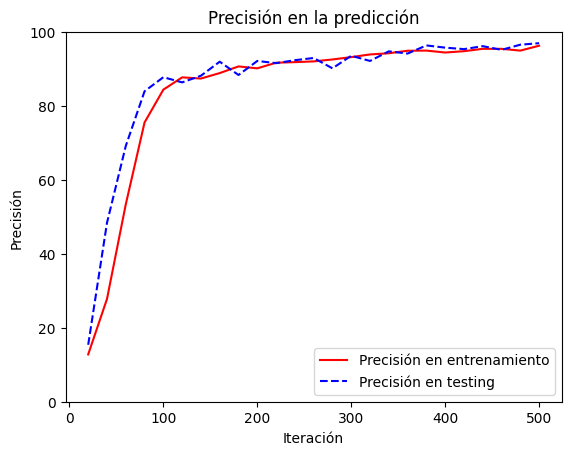

In [18]:
# Graficar la precisión
plt.plot(i_vals, train_acc, 'r-', label="Precisión en entrenamiento")
plt.plot(i_vals, test_acc, 'b--', label="Precisión en testing")
plt.xlabel("Iteración")
plt.ylabel("Precisión")
plt.ylim([0, 100])
plt.title("Precisión en la predicción")
plt.legend(loc="lower right")
plt.show()


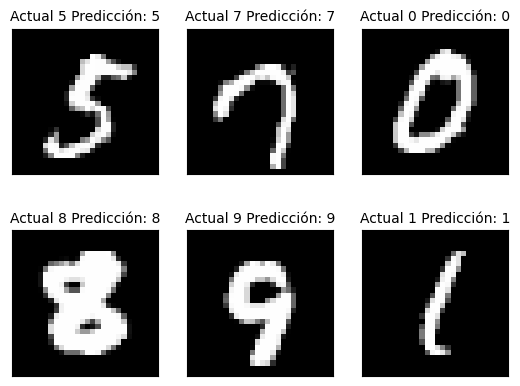

In [19]:
# Mostrar predicciones
rand_x = train_xdata[rand_idx]
rand_y = train_labels[rand_idx]
predictions = np.argmax(model(rand_x), axis=1)

actuals = rand_y[:6]
images = np.squeeze(rand_x[:6])

nrows, ncols = 2, 3
for i in range(6):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(np.reshape(images[i], [28, 28]), cmap="Greys_r")
    plt.title(f"Actual {actuals[i]} Predicción: {predictions[i]}", fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
plt.show()